# **Classification:** Perceptron Trick with (**Sigmoid Function**)

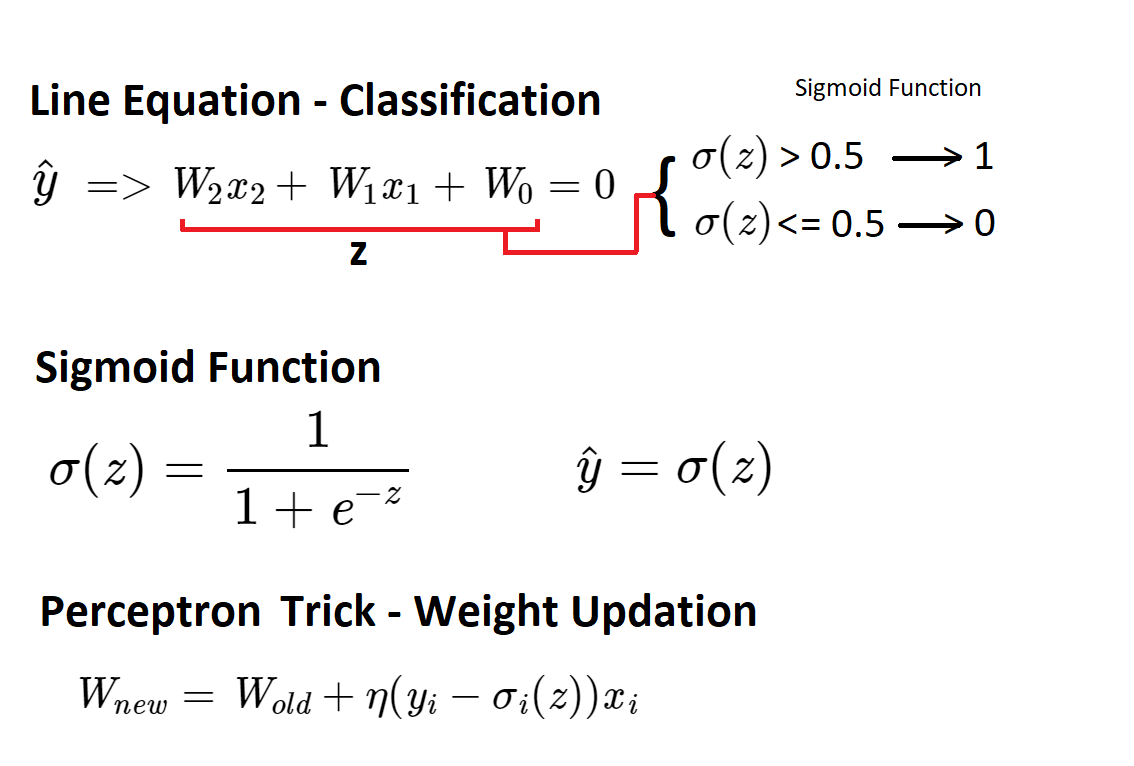

In [1]:
from IPython.display import Image
Image(filename='Perceptron Trick with Sigmoid.png')

In [2]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

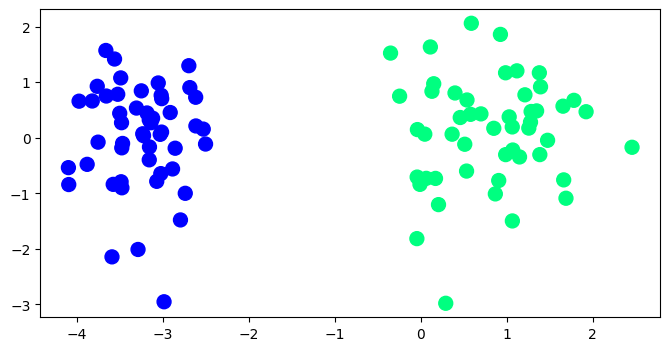

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

## **Perceptron Trick:** With Step Function

In [8]:
def perceptron(X,y):

    def step(z):
        return 1 if z>0 else 0
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [9]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.05343617 0.2221512 ]
1.3000000000000003


In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

print(f"m = {m:.2f}, b = {b:.2f}")

m = -4.74, b = -5.85


(-3.0, 2.0)

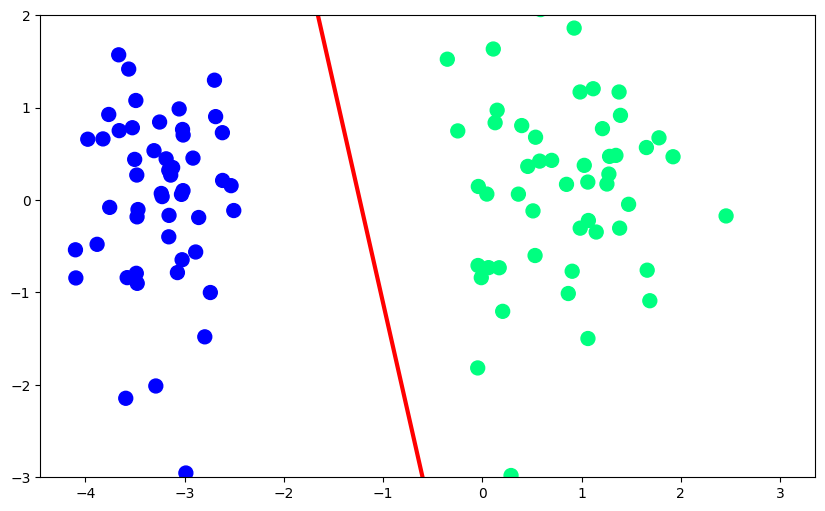

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## **Perceptron Trick:** With Sigmoid Function

In [12]:
def perceptron(X,y):

    def sigmoid(z):
        return 1/(1 + np.exp(-z))
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [13]:
intercept_,coef_ = perceptron(X,y)
print(f"Coefficients: {coef_}")
print(f"Intercept: {intercept_}")

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

print(f"m = {m:.2f}, b = {b:.2f}")

Coefficients: [2.84093018 0.06082297]
Intercept: 2.8574874927683322
m = -46.71, b = -46.98


(-3.0, 2.0)

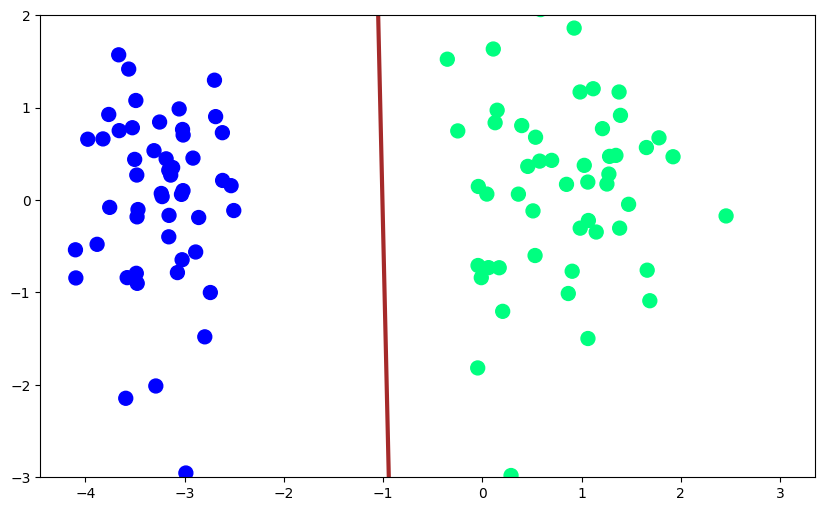

In [14]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## **Plot:** Step, Sigmoid and Sklearn Logistic

In [73]:
def perceptron(X,y):

    def step(z):
        return 1 if z>0 else 0
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

intercept_,coef_ = perceptron(X,y)

m_step = -(coef_[0]/coef_[1])
b_step = -(intercept_/coef_[1])

print(m_step, b_step)

x_input_step = np.linspace(-3,3,100)
y_input_step = m_step*x_input_step + b_step

-3.012170035579733 -3.8395687654294357


In [74]:
def perceptron(X,y):

    def sigmoid(z):
        return 1/(1 + np.exp(-z))
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]


intercept_,coef_ = perceptron(X,y)

m_sig = -(coef_[0]/coef_[1])
b_sig = -(intercept_/coef_[1])

print(m_sig, b_sig)

x_input_sig = np.linspace(-3,3,100)
y_input_sig = m_sig*x_input_step + b_sig

-23.002915451228745 -22.79219963704943


In [75]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

x_input_log = np.linspace(-3,3,100)
y_input_log = m*x_input_step + b

print(m, b)

-108.63393776921424 [-143.9574588]


(-3.0, 2.0)

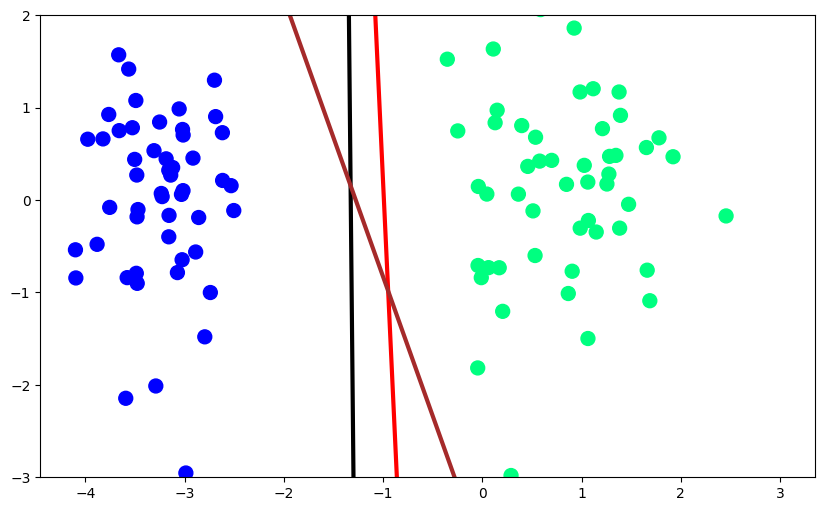

In [79]:
plt.figure(figsize=(10,6))
plt.plot(x_input_step,y_input_sig,color='red',linewidth=3)
plt.plot(x_input_step,y_input_log,color='black',linewidth=3)
plt.plot(x_input_step,y_input_step,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)